<a href="https://colab.research.google.com/github/sidhant1304/CommunityClassroom-Git/blob/master/Sidhant_Rai_Home_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Loan Prediction
This dataset `full_home_loans.csv` is about home loan applications in Washington state, USA, where each row of the dataset is an individual loan application. Your goal in this assignment is to build a machine learning model that can accurately predict whether a given loan application was accepted or rejected.


## Part 1: Data Exploration
The first few exercises will get you used to looking at the data using `pandas`. Pandas is a widely used library in python for manipulating data. Why? Datasets can consume a _lot_ of space in your computer's memory and traditional python data structures like lists or dictionaries will become painfully slow as we add thousands of rows of data. We use a specialized dataset library `pandas` which has a specialized data structure called a `dataframe` designed to be ultra fast & efficient. Documentation is here: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # import pandas library

path = '/content/drive/MyDrive/HAII Assignments /home_loans.csv'


df = pd.read_csv(path, low_memory=False) # read the csv file into a pandas dataframe object

To understand what kind of data was collected, `pandas` has some handy commands:

- `df.head()` will show us the first 5 rows of our dataset. You can also specify the first N rows, like `df.head(18)` will show us the first 18 rows.
- `df.sample(10)` will show us 10 randomly sampled rows of our dataset
- `df.shape` will tell us how many rows and how many columns are in the dataset
- `df.columns` will list the names of all columns in the dataset
- `df.describe()` will give you summary statistics about all numerical columns in the dataset

### Question 1.A:  How many rows are in this dataset? How many columns?

There are 369281 row and 27 columns

In [ ]:
df.shape

(369281, 27)

### Question 1.B: One of the columns in the dataset is the outcome value for each application, the value we will try to predict. Which column is that?

It is the 'loan_approved' column

In [ ]:
df.columns

Index(['town_name', 'county_name', 'loan_amount_000s', 'applicant_income_000s',
       'property_type_name', 'occupied_by_owner', 'loan_type_name',
       'is_hoepa_loan', 'loan_purpose_name', 'loan_approved',
       'denial_reason_name_3', 'denial_reason_name_2', 'denial_reason_name_1',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2',
       'applicant_race_name_1', 'applicant_ethnicity_name'],
      dtype='object')

In [ ]:
loan_approved_unique_values = df['loan_approved'].unique()

print(loan_approved_unique_values)

[1 0]


### Question 1.C: What reasons were given in this dataset for denying a loan application?
Hint: There are 3 columns in the dataset that list why a loan was denied. Try looking up the pandas command to list the unique values in a column.



1.   Other
2.   Credit application incompleteOtherCredit history
1.   Collateral
1.   Insufficient cash (downpayment, closing costs)
2.   Credit application incomplete
1.   Debt-to-income ratio
6.   Employment history
7.   Credit history   
9.   Unverifiable information
10.   Mortgage insurance denied








In [ ]:
denial_reason_name_01 = df['denial_reason_name_1'].dropna().unique()

denial_reason_name_02 = df['denial_reason_name_2'].dropna().unique()

denial_reason_name_03 = df['denial_reason_name_3'].dropna().unique()

# Appending the lists together
denial_reason_list = list(set(denial_reason_name_01)) + list(set(denial_reason_name_02)) + list(set(denial_reason_name_03))


# Print the result
print(list(set(denial_reason_list)))



['Employment history', 'Collateral', 'Debt-to-income ratio', 'Insufficient cash (downpayment, closing costs)', 'Credit history', 'Credit application incomplete', 'Mortgage insurance denied', 'Unverifiable information', 'Other']


### Question 1.D: Given the denial reasons and the columns in this dataset, think about what information you _don't_ have about each application. Rank your top 3 _missing_ pieces of information about each application that could help you better predict the application's loan outcome.

_Double click to write your answer question here. Show your work in code below if applicable._

#1.Borrowers Credit score  
#2.Valuation of Property  
#3.Co-Borrowers Credit Score

In [ ]:
df.head()

,town_name,county_name,loan_amount_000s,applicant_income_000s,property_type_name,occupied_by_owner,loan_type_name,is_hoepa_loan,loan_purpose_name,loan_approved,...,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name
0,"Portland, Vancouver, Hillsboro - OR, WA",Clark County,227,116.0,One-to-four family dwelling (other than manufa...,1,Conventional,0,Refinancing,1,...,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino
1,Walla Walla - WA,Walla Walla County,240,42.0,One-to-four family dwelling (other than manufa...,1,FHA-insured,0,Home purchase,1,...,NaN,No co-applicant,No co-applicant,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino
2,"Portland, Vancouver, Hillsboro - OR, WA",Clark County,241,117.0,One-to-four family dwelling (other than manufa...,1,Conventional,0,Refinancing,1,...,NaN,White,Not Hispanic or Latino,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino
3,"Portland, Vancouver, Hillsboro - OR, WA",Clark County,351,315.0,One-to-four family dwelling (other than manufa...,1,Conventional,0,Refinancing,1,...,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,..."
4,"Bremerton, Silverdale - WA",Kitsap County,417,114.0,One-to-four family dwelling (other than manufa...,1,Conventional,0,Home improvement,1,...,NaN,White,Not Hispanic or Latino,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino


## Part 2: Preparing Data to Input to a Model
Here we'll start using `scikit-learn` which provides simple library calls for most things we'd like to do in a simple machine learning pipeline. If you haven't used `scikit-learn` before this tutorial may be useful to give you a sense of what the library can do: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

Many machine learning models can only understand data that is represented numerically, but lots of the columns in our dataset like "town_name" are text _categorical_ data. Meanwhile, many models do better when continuous numerical data is within small, consistent ranges, such as all data being between -1, 0 and 1, which is definitely not the case with our thousands of dollars loan units.

So first, we will separate our samples (called _X_) into features we'd like to include in our model that are categorical or continuous so that we can preprocess each appropriately separately.

In [ ]:
import sklearn # import scikit-learn
from sklearn import preprocessing # import preprocessing utilites

features_cat = ['loan_purpose_name', 'applicant_sex_name']
features_num = ['loan_amount_000s', 'applicant_income_000s']

X_cat = df[features_cat]
X_num = df[features_num]

### Part 2.A One Hot Encode Categorical Variables
Run the following code to one hot encode the categorical features:

In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_cat) # fit the encoder to categories in our data
one_hot = enc.transform(X_cat) # transform data into one hot encoded sparse array format

In [ ]:
# Finally, put the newly encoded sparse array back into a pandas dataframe so that we can use it
X_cat_proc = pd.DataFrame(one_hot.toarray(), columns=enc.get_feature_names_out())
X_cat_proc.head()

,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,applicant_sex_name_Female,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Question 2.A: In your own words, how is one hot coding tranforming the categorical data? What does the term "one-hot" refer to?

The one hot coding is transforming the categorical data into machine eadable columns for each category. Each category in a particular row is represented by number "1" for its presence in the row and "0" for its absense.

In the term "one-hot", one is the representation of the category and hot represents its presence.

### Part 2.B Scaling down continuous numerical data
Run the following code to normalize any continous numberical features, such as loan dollar amount, between -1 and 0. This process will ensure that the average of that feature, such as the average amount that a person asks for in loan amount, is scaled to 0. Values less than the average will be negative numbers, and values larger than the average will be positive numbers.

In [ ]:
scaled = preprocessing.scale(X_num)
X_num_proc = pd.DataFrame(scaled, columns=features_num)
X_num_proc.head()

,loan_amount_000s,applicant_income_000s
0,-0.130864,0.016448
1,-0.103680,-0.596232
2,-0.101589,0.024727
3,0.128424,1.664059
4,0.266432,-0.000111


### Part 2.C Merge our feature sets into one sample dataset _X_ and fix NaN values
Run the code below to combine the numerical and categorical feature sets.

In [ ]:
X = pd.concat([X_num_proc, X_cat_proc], axis=1, sort=False)
X.head()

,loan_amount_000s,applicant_income_000s,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,applicant_sex_name_Female,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable
0,-0.130864,0.016448,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.103680,-0.596232,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.101589,0.024727,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.128424,1.664059,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.266432,-0.000111,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Question 2.C Describe what the code below does.

It replaces all the mising values in the entire dataframe with zero value.

In [ ]:
X = X.fillna(0)

In [ ]:
X.head()

,loan_amount_000s,applicant_income_000s,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,applicant_sex_name_Female,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable
0,-0.130864,0.016448,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.103680,-0.596232,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.101589,0.024727,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.128424,1.664059,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.266432,-0.000111,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Part 2.D Create our target array _y_ that our model will try to predict

In [ ]:
y = df['loan_approved'] # target

### Part 2.E Split our data into training, test, and validation sets
Run the code below to split the data. Both validation and test sets will be used for testing our model, but use the validation set while you are developing and improving your model, and leave the test for late stage evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_TEMP, y_train, y_TEMP = train_test_split(X, y, test_size=0.30) # split out into training 70% of our data
X_validation, X_test, y_validation, y_test = train_test_split(X_TEMP, y_TEMP, test_size=0.50) # split out into validation 15% of our data and test 15% of our data
print(X_train.shape, X_validation.shape, X_test.shape) # print data shape to check the sizing is correct

(258496, 9) (55392, 9) (55393, 9)


### Question 2.E:  Describe the differences between train, test, and validation sets?

**Train sets** consists of the largest dataset in the Machine Learning model which is used for traning the model and typically consists of the 70%-80% of the dataset. It consists of the feature dataset and the corresponding labelled dataset.

**Test sets** typically consists of the 15%-20% dataset in the Machine Learning model which is used for checking the precision, recall, accuracy, F1 Score of the model and the baises that may occur due to incorrect data or due to data drift.It consists of the feature dataset and the corresponding labelled dataset.

**Validation sets** typically consists of the 15%-20% dataset in the Machine Learning model which is used for checking the overfitting/underfitting of the model and tuning the hyperparameters.Several permutations and combination of the model type and hyperparameters are done to come to an optimized Machine learning model for improved performance.

## Part 3. Developing Models
Scikit-learn has a substantial library of different models we can use for classification. Below are implemented two of the most simple classification models, Logistic Regression and Dummy Classifier.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# helper method to print basic model metrics
def metrics(y_true, y_pred):
    print('Confusion matrix:\n', confusion_matrix(y_true, y_pred))
    print('\nReport:\n', classification_report(y_true, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs').fit(X_train, y_train) # first fit (train) the model
y_pred = model.predict(X_validation) # next get the model's predictions for a sample in the validation set
metrics(y_validation, y_pred) # finally evaluate performance

Confusion matrix:
 [[    0  9095]
 [    0 46297]]

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9095
           1       0.84      1.00      0.91     46297

    accuracy                           0.84     55392
   macro avg       0.42      0.50      0.46     55392
weighted avg       0.70      0.84      0.76     55392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Dummy Classifier is a 'dummy' because it is going to use zero machine learning, and simply predict "approve this loan" (value 1) for every loan it sees.

In [ ]:
from sklearn.dummy import DummyClassifier

approve_everyone = DummyClassifier(strategy='constant', constant = 1).fit(X_train, y_train) # first fit (train) the model
y_pred_dummy = approve_everyone.predict(X_validation) # next get the model's predictions for a sample in the validation set
metrics(y_validation, y_pred_dummy) # finally evaluate performance

Confusion matrix:
 [[    0  9095]
 [    0 46297]]

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9095
           1       0.84      1.00      0.91     46297

    accuracy                           0.84     55392
   macro avg       0.42      0.50      0.46     55392
weighted avg       0.70      0.84      0.76     55392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 3.A: Considering only the data itself, why do Logistic Regression and the Dummy Classifier perform the same? What is the semantic meaning for why Dummy Classifier has such high accuracy?

A possible reason for for both Logistic Regression and Dummy Classifier to perform the same could be the imbalanced labeled dataset

## Part 4: Your turn!

### Task 4.A: Create a new balanced dataset where exactly half of the samples are rejected loan applications and half are accepted loan application.
_show your work below_

In [ ]:
y_bal_check = df['loan_approved'] # target

zero_approval_rows = df[df['loan_approved'] == 0]
num_zero_approvals = len(zero_approval_rows)

print(num_zero_approvals)

60380


In [ ]:
balance_loan_approved = df[df['loan_approved'] == 1].sample(n=60380, random_state=40)

balance_loan_disapproved = df[df['loan_approved'] == 0]


In [ ]:
balanced_df = pd.concat([balance_loan_approved.sample(n=60380, random_state=40),
                         balance_loan_disapproved.sample(n=60380, random_state=40)])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df.shape)

(120760, 27)


In [ ]:

features_cat = ['loan_purpose_name', 'applicant_sex_name']
features_num = ['loan_amount_000s', 'applicant_income_000s']

X_cat_bal = balanced_df[features_cat]
X_num_bal = balanced_df[features_num]

In [ ]:
enc_bal = preprocessing.OneHotEncoder()
enc_bal.fit(X_cat_bal) # fit the encoder to categories in our data
one_hot_bal = enc.transform(X_cat_bal) # transform data into one hot encoded sparse array format


print(one_hot_bal.shape)

(120760, 7)


In [ ]:
# Finally, put the newly encoded sparse array back into a pandas dataframe so that we can use it
X_cat_proc_bal = pd.DataFrame(one_hot_bal.toarray(), columns=enc.get_feature_names_out())
X_cat_proc_bal.head()

print(X_cat_proc_bal.shape)

(120760, 7)


In [ ]:
scaled_bal = preprocessing.scale(X_num_bal)
X_num_proc_bal = pd.DataFrame(scaled_bal, columns=features_num)
X_num_proc_bal.head()

print(X_num_proc_bal.shape)

(120760, 2)


In [ ]:
X_bal = pd.concat([X_num_proc_bal, X_cat_proc_bal], axis=1, sort=False)
X_bal.head()

print(X_bal.shape)

(120760, 9)


In [ ]:
X_bal = X_bal.fillna(0)

### Task 4.B: Below, retry training and evaluating a Logistic regression model on the updated data.
_show your work below_

In [ ]:
y_balanced = balanced_df['loan_approved'] # target

y_balanced.head()

print(y_balanced.shape)

(120760,)


In [ ]:
X_train_bal, X_TEMP_bal, y_train_bal, y_TEMP_bal = train_test_split(X_bal, y_balanced, test_size=0.30) # split out into training 70% of our data

X_validation_bal, X_test_bal, y_validation_bal, y_test_bal = train_test_split(X_TEMP_bal, y_TEMP_bal, test_size=0.50) # split out into validation 15% of our data and test 15% of our data

print(X_train_bal.shape, X_validation_bal.shape, X_test_bal.shape) # print data shape to check the sizing is correct

(84532, 9) (18114, 9) (18114, 9)


### Task 4.C: Use your own imagination and experimentation to improve predictive performance for this task, modifying the model choices, feature choices, and data processing however you wish.
_Important! Your ability to improve the model above the baseline after Task 4.B will count for 10% of this assignment grade, with 5% of that given for modest improvements to performance. Thus while we encourage you to experiment, do not sink excessive time into this task. We will test the performance on our own holdout dataset._

_show your work below_

Logistic Regression Over Balanced Dataset : 66% accuracy

In [ ]:
model_bal = LogisticRegression(solver='lbfgs').fit(X_train_bal, y_train_bal) # first fit (train) the model

y_pred_bal = model_bal.predict(X_validation_bal) # next get the model's predictions for a sample in the validation set

metrics(y_validation_bal, y_pred_bal) # finally evaluate performance

Confusion matrix:
 [[7099 1908]
 [4283 4824]]

Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70      9007
           1       0.72      0.53      0.61      9107

    accuracy                           0.66     18114
   macro avg       0.67      0.66      0.65     18114
weighted avg       0.67      0.66      0.65     18114



Hyperparameter tuning over Logistic Regression : No change in accuracy

In [ ]:
model_bal_2 = LogisticRegression(solver='lbfgs', max_iter=5000, C=4).fit(X_train_bal, y_train_bal) # first fit (train) the model

y_pred_bal_2 = model_bal_2.predict(X_validation_bal) # next get the model's predictions for a sample in the validation set

metrics(y_validation_bal, y_pred_bal_2) # finally evaluate performance

Confusion matrix:
 [[7099 1908]
 [4283 4824]]

Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70      9007
           1       0.72      0.53      0.61      9107

    accuracy                           0.66     18114
   macro avg       0.67      0.66      0.65     18114
weighted avg       0.67      0.66      0.65     18114



Random Forest Classifier : Accuracy decreased by 3%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Random Forest Classifier with your desired hyperparameters
model_rf_bal_2 = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit (train) the model on the balanced training data
model_rf_bal_2.fit(X_train_bal, y_train_bal)

# Get the model's predictions for a sample in the validation set
y_pred_rf_bal_2 = model_rf_bal_2.predict(X_validation_bal)

# Evaluate performance
def metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

metrics(y_validation_bal, y_pred_rf_bal_2)

Accuracy: 0.6316661146074859

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      9007
           1       0.63      0.63      0.63      9107

    accuracy                           0.63     18114
   macro avg       0.63      0.63      0.63     18114
weighted avg       0.63      0.63      0.63     18114


Confusion Matrix:
 [[5696 3311]
 [3361 5746]]


XGBoost Classifier : Was able to imporve accuracy by 3% after six hyperparameter tuning attempts

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the XGBoost model
model_xgb = xgb.XGBClassifier(n_estimators=50, learning_rate=0.3, max_depth=5, random_state=2)
model_xgb.fit(X_train_bal, y_train_bal)

# Predict on the validation set
y_pred_xgb = model_xgb.predict(X_validation_bal)

# Evaluate the performance of the XGBoost model
print("Confusion Matrix:")
print(confusion_matrix(y_validation_bal, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_validation_bal, y_pred_xgb))

Confusion Matrix:
[[6388 2619]
 [3021 6086]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      9007
           1       0.70      0.67      0.68      9107

    accuracy                           0.69     18114
   macro avg       0.69      0.69      0.69     18114
weighted avg       0.69      0.69      0.69     18114



Analysing the features of influence : Did not do anything further to avoid overfitting

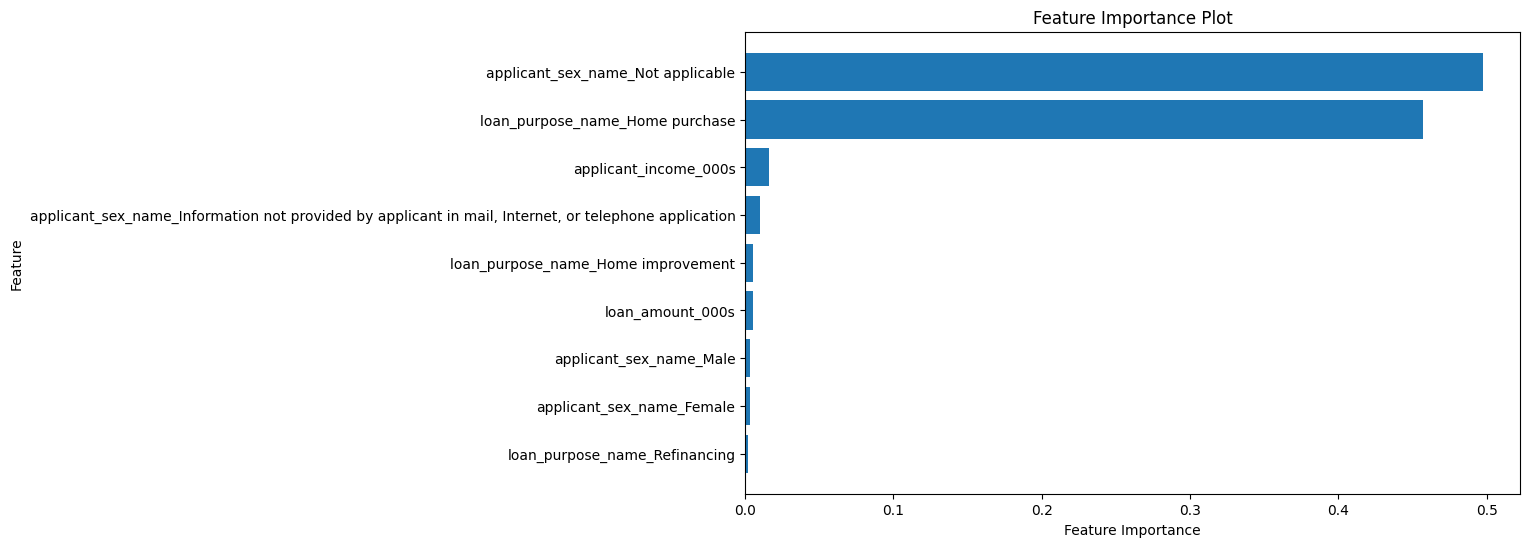

In [ ]:
import matplotlib.pyplot as plt

#Get feature importances
feature_importances = model_xgb.feature_importances_

# Get the names of the features
feature_names = X_train_bal.columns

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

# Documenting collaborations
## Briefly list and describe the sources you received help from, and how they helped you
### These may include friends, peers, TAs, generative AI tools, etc.

I used genrative AI tools with prompts such as:




*   get count of columns in dataframe
*   get count of rows in dataframe
*   unique data in a column of df
*   append 3 lists
*   y_bal_check = df['loan_approved']  find the number of rows where loan_approved is zero
*   zero_approval_rows = df[df['loan_approved'] == 1]
num_zero_approvals = len(zero_approval_rows)
*   pick random 60380 rows from df where where loan_approved is 1
*   balance_loan_approved = df[df['loan_approved'] == 1].sample(n=60380, random_state=40)
*   balance_loan_disapproved = df[df['loan_approved'] == 0]
*   make balance_loan_approved and balance_loan_disapproved  a combined dataframe with balanced distribution of the two types

I also discussed and cross-verified with my peers on the methods of selecting a balanced dataset

# Learning assessment

### Reflect in a few words the amount of new content learned from completing the assignment.
### If most of the material was not new to you, where did you see it before?

The assignment acted as a refresher for basic python (pandas, scikit-learn) syntax.

I learned the importance of having a balanced dataset and trying different classification models. I learnt the hands on challenges that data scientist face while tuning hyperparameters

Also learnt that SVM Classifiers take too long to execute. Hence, deleted from the collab book as it was not increasing the accuracy